# Compare spectra

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules: 
  - plothelper.py
  executeorder:
  - plotcsv

plotcsv:
  - name: plotSuu
    xlabel: 'f [Hz]'
    ylabel: '$f S_{uu}/U^2$'
    xscale: log
    yscale: log
    title: '$S_{uu}$'
    figsize: [5,4]
    legendopts: {'loc':'lower left'}
    postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../NALU.5kmX5km_turbine1/postprocessing/naluspectra1.csv', 'xcol':'f', 'ycol':'Suu', 
      'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Nalu-Wind'}}    
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/amrspectra1.csv', 'xcol':'f', 'ycol':'Suu', 
      'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../WRFLES.5kmX5km_turbine1/post_processing/wrfspectra1.csv',  'xcol':'f', 'ycol':'Suu', 
       'lineopts':{'color':'orange', 'lw':1, 'linestyle':'-.', 'label':'WRF-LES'}}      
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/amrkaimal1.csv',  'xcol':'f', 'ycol':'Suu', 
       'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}
       
       
  - name: plotSvv
    xlabel: 'f [Hz]'
    ylabel: '$f S_{vv}/U^2$'
    xscale: log
    yscale: log
    title: '$S_{vv}$'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../NALU.5kmX5km_turbine1/postprocessing/naluspectra1.csv', 'xcol':'f', 'ycol':'Svv', 
      'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Nalu-Wind'}}    
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/amrspectra1.csv', 'xcol':'f', 'ycol':'Svv', 
      'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../WRFLES.5kmX5km_turbine1/post_processing/wrfspectra1.csv',  'xcol':'f', 'ycol':'Svv', 
       'lineopts':{'color':'orange', 'lw':1, 'linestyle':'-.', 'label':'WRF-LES'}}            
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/amrkaimal1.csv',  'xcol':'f', 'ycol':'Svv', 
       'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}

  - name: plotSww
    xlabel: 'f [Hz]'
    ylabel: '$f S_{ww}/U^2$'
    xscale: log
    yscale: log
    title: '$S_{ww}$'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../NALU.5kmX5km_turbine1/postprocessing/naluspectra1.csv', 'xcol':'f', 'ycol':'Sww', 
      'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Nalu-Wind'}}    
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/amrspectra1.csv', 'xcol':'f', 'ycol':'Sww', 
      'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../WRFLES.5kmX5km_turbine1/post_processing/wrfspectra1.csv',  'xcol':'f', 'ycol':'Sww', 
       'lineopts':{'color':'orange', 'lw':1, 'linestyle':'-.', 'label':'WRF-LES'}}            
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/amrkaimal1.csv',  'xcol':'f', 'ycol':'Sww', 
       'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized plotcsv
Running plotcsv


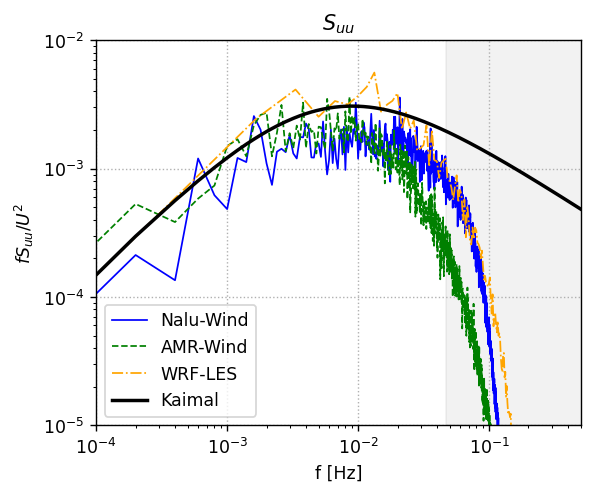

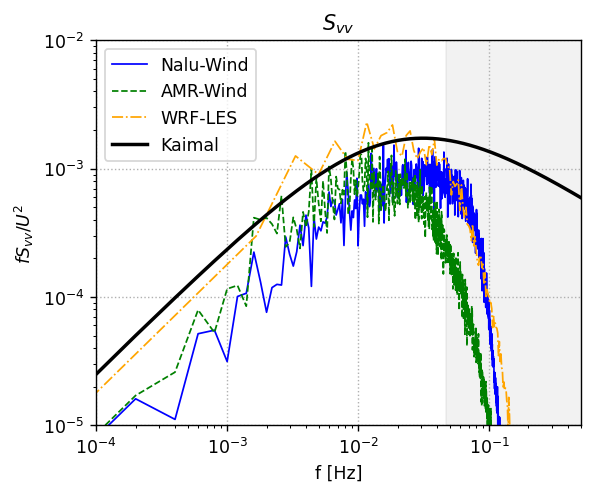

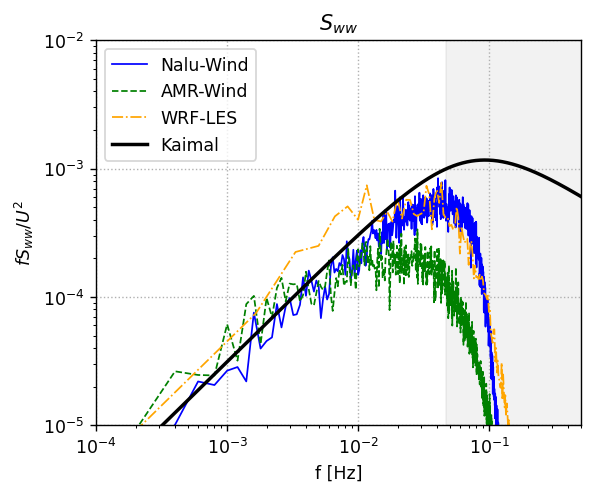

In [4]:
# Run the driver
ppeng.driver(yamldict)